In [168]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
import seaborn as sns
import os

In [169]:
train_path = "/content/vulgar csv dataset.csv"


telugu_vulgar_df = pd.read_csv(train_path)
telugu_vulgar_df

,Text,Type
0,హీరోగా తెలుగు సినిమాల్లోకి ఎంట్రీ ఇచ్చిన నిఖిల...,Normal
1,సినిమాల్లో యాక్షన్ స్టంట్లు చేసేటప్పుడు ఎక్కు...,Normal
2,దక్షిణ భారతాన్ని ఆక్రమించేందుకు బీజేపీ పంచెలు ...,Normal
3,నేటి మధ్యాహ్నం 1.59కి కౌంట్‌డౌన్‌ షురూశ్రీహరి...,Normal
4,‘ఏమి రా... అబ్బి... యాడికి పోయినావు’ అంటూ రాయ...,Normal
5,\nన్యూఢిల్లీ : ఆప్ సీనియర్ నేత కుమార్ విశ్వాస్...,Normal
6,70రోజులు.. 60 కెమెరాల మధ్య.. 14 మంది కంటెస్టెం...,Normal
7,న్యూఢిల్లీ: దేశవాళీ స్మార్ట్‌ఫోన్ తయారీ సంస్థ ...,Normal
8,"మహాత్ముడి అహింసా సిద్ధాంతంపై పాటఅమరావతి, నవంబర...",Normal
9,గుద్ద బలిసి కొట్టుకుంటున్నావురా,vulgar


In [170]:
telugu_vulgar_df.isna().sum()

Text    0
Type    0
dtype: int64

In [173]:
telugu_vulgar_df["Type"].unique()

array(['Normal', 'vulgar'], dtype=object)

In [174]:
type_dic = {}

c = 0
for un in telugu_vulgar_df["Type"].unique():
    if un not in type_dic:
        type_dic[un] = c
        c += 1
        
type_dic

{'Normal': 0, 'vulgar': 1}

In [175]:
inv_type_dict = {v: k for k, v in type_dic.items()}

In [176]:
def func_type(s):
    return type_dic[s]

telugu_vulgar_df["Type"] = telugu_vulgar_df["Type"].apply(func_type)

In [178]:
pip install indic-nlp-library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**Preprocessing the data**


In [179]:
from indicnlp.tokenize import sentence_tokenize

indic_string = telugu_vulgar_df["Text"][0]
# Split the sentence, language code "hi" is passed for hingi
sentences=sentence_tokenize.sentence_split(indic_string, lang='te')

# print the sentences
for t in sentences:
    print(t)

హీరోగా తెలుగు సినిమాల్లోకి ఎంట్రీ ఇచ్చిన నిఖిల్‌కు స్వామిరారా సినిమా పెద్ద బ్రేక్‌ ఇచ్చింది.
ఆ సినిమా దర్శకుడు సుధీర్‌ వర్మ నిఖిల్‌కు మంచి స్నేహితుడు కూడా.
స్వామిరారా నుండి నిఖిల్‌ కార్తికేయ, ఎక్కడికి పోతావు చిన్నవాడా చిత్రాలతో సక్సెస్‌ఫుల్‌ హీరోగా పేరు తెచ్చుకున్నాడు.
క్రైమ్‌ కామెడి నేపథ్యంలో స్వామిరారా చిత్రాన్ని రూపొందించిన సుధీర్‌ వర్మ, నిఖిల్‌తో మరో సినిమా చేస్తున్నాడనగానే ఈ హిట్‌ ద్వయం ఎలాంటి సినిమా చేస్తుందో, ఈసారి ఎలాంటి జోనర్‌లో మూవీ చేస్తారోనని అనుకున్నారు.
నిఖిల్‌, సుధీర్‌ వర్మ కాంబినేషన్‌లో రివేంజ్‌ డ్రామాగా 'కేశవ' చిత్రం రూపొందుతోందని తెలియగానే, విభిన్నమైన స్క్రిప్ట్‌లను ఎన్నుకునే నిఖిల్‌ కేశవలో ఎలా కనపడనున్నాడోనని అందరూ అనుకున్నారు.
మరి కేశవ అందరి ఊహలను రీచ్‌ అయ్యిందా లేదా అని తెలుసుకుందాం. . . సమర్పణ: దేవాన్ష్‌ నామా నిర్మాణ సంస్థ: అభిషేక్‌ పిక్చర్స్‌తారాగణం: నిఖిల్‌, రీతూవర్మ, ప్రియదర్శి, వెన్నెలకిషోర్‌, నందకిషోర్‌, మధునందన్‌, అజయ్‌, రావు రమేష్‌, బ్రహ్మాజీ, రాజా రవీంద్ర తదితరులు సంగీతం: సన్ని ఎం.
ఆర్‌ ఛాయాగ్రహణం: దివాకర్‌ మణి నేపథ్య సంగీతం: ప్రశాంత్‌ పిళ్ళై కూర్పు : ఎస్‌

In [180]:
telugu_vulgar_df["text_processed"] = telugu_vulgar_df["Text"].str.replace('\u200c', '')
telugu_vulgar_df["text_processed"] = telugu_vulgar_df["text_processed"].str.replace('\n', '')
telugu_vulgar_df["text_processed"] = telugu_vulgar_df["text_processed"].str.replace('\t', '')
telugu_vulgar_df["text_processed"] = telugu_vulgar_df["text_processed"].str.replace('\xa0', '')

In [181]:
PUNCT = string.punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT))

In [182]:
telugu_vulgar_df["text_processed"][5]

'న్యూఢిల్లీ : ఆప్ సీనియర్ నేత కుమార్ విశ్వాస్తో తనకు భేదాభిప్రాయాలు ఉన్నట్లు జరుగుతున్న ప్రచారాన్ని ఢిల్లీ ముఖ్యమంత్రి అరవింద్ కేజ్రీవాల్ తోసిపుచ్చారు. విశ్వాస్ తన ట్విటర్ ఖాతాలో పోస్ట్ చేసిన వీడియోలో ఆప్ ప్రభుత్వాన్ని, కేజ్రీవాల్ను పరోక్షంగా విమర్శించిన సంగతి తెలిసిందే.ఓ ఇంటర్వ్యూ క్లిప్ను కేజ్రీవాల్ రీట్వీట్ చేశారు. విశ్వాస్ పట్ల తనకు కోపం లేదని, ఆయన తన కుటుంబ సభ్యుడని పేర్కొన్నారు. ఆయన కేవలం పార్టీ సభ్యుడు మాత్రమే కాదని, వాస్తవానికి కుటుంబ సభ్యుడని పేర్కొన్నారు. అలాంటి విషయాలపై రాద్దాంతం చేయడానికి మీడియా ఇష్టపడుతుందని, ఇకపై ‘‘నా భార్య నన్ను టార్గెట్ చేస్తున్నట్లు’’ మీడియా ప్రచారం చేయగలదన్నారు.'

In [183]:
from indicnlp.tokenize import sentence_tokenize


tot_telugu_text1 = ""

for t in telugu_vulgar_df["text_processed"]:
  tot_telugu_text1 += t

# tot_sentances_telugu = []

tot_sentences = sentence_tokenize.sentence_split(tot_telugu_text1, lang='te')
print(len(tot_sentences))

207


In [184]:
telugu_vulgar_df["text_processed"] = telugu_vulgar_df["text_processed"].apply(lambda text: remove_punctuation(text))

In [185]:
del telugu_vulgar_df["Text"]

In [186]:
tot_telugu_text = ""

c = 1
for t in telugu_vulgar_df["text_processed"]:
  tot_telugu_text += t
  c += 1

print(c)

20


In [187]:
from indicnlp.tokenize import indic_tokenize  

vocab_dic  = {}
tokenized_text = []
heap_arr = []

for t in indic_tokenize.trivial_tokenize(tot_telugu_text):
    tokenized_text.append(t)
    heap_arr.append(len(vocab_dic))

    if t not in vocab_dic:
      vocab_dic[t] = 1

    else:
      vocab_dic[t] += 1

In [188]:
from nltk.probability import FreqDist 

freq_dist = FreqDist(vocab_dic)

In [189]:
vocab_dic_sorted = {k: v for k, v in sorted(vocab_dic.items(), key=lambda item: item[1], reverse = True)}

In [190]:
top_k_words = []

k = 50
c = 0

for key in vocab_dic_sorted.keys():

  if c == k:
    break

  top_k_words.append([key, vocab_dic_sorted[key]])
  c += 1

In [191]:
top_k_words_df = pd.DataFrame(top_k_words)
top_k_words_df.columns = ["word", "freq"]
top_k_words_df.head()

,word,freq
0,ఈ,16
1,ఆ,15
2,అని,9
3,హీరో,9
4,నా,9


In [192]:
telugu_words = list(vocab_dic_sorted.keys())

In [193]:
tot_sentences_proc = []

for sen in tot_sentences:
  tot_sentences_proc.append(remove_punctuation(sen))

In [194]:
telugu_vulgar_df["Type"].unique()

array([0, 1])

#**Training the data**

In [195]:
test_path = "/content/vulgar csv dataset.csv"

test_vulgar_df = pd.read_csv(test_path)

test_vulgar_df.head()

,Text,Type
0,హీరోగా తెలుగు సినిమాల్లోకి ఎంట్రీ ఇచ్చిన నిఖిల...,Normal
1,సినిమాల్లో యాక్షన్ స్టంట్లు చేసేటప్పుడు ఎక్కు...,Normal
2,దక్షిణ భారతాన్ని ఆక్రమించేందుకు బీజేపీ పంచెలు ...,Normal
3,నేటి మధ్యాహ్నం 1.59కి కౌంట్‌డౌన్‌ షురూశ్రీహరి...,Normal
4,‘ఏమి రా... అబ్బి... యాడికి పోయినావు’ అంటూ రాయ...,Normal


In [196]:
y_test = test_vulgar_df["Type"].apply(func_type)
del test_vulgar_df["Type"]

In [197]:
test_vulgar_df["text_processed"] = test_vulgar_df["Text"].str.replace('\u200c', '')
test_vulgar_df["text_processed"] = test_vulgar_df["text_processed"].str.replace('\n', '')
test_vulgar_df["text_processed"] = test_vulgar_df["text_processed"].str.replace('\t', '')
test_vulgar_df["text_processed"] = test_vulgar_df["text_processed"].str.replace('\xa0', '')

test_vulgar_df["text_processed"] = test_vulgar_df["text_processed"].apply(lambda text: remove_punctuation(text))

del test_vulgar_df["Text"]

In [198]:
test_vulgar_df.head()

,text_processed
0,హీరోగా తెలుగు సినిమాల్లోకి ఎంట్రీ ఇచ్చిన నిఖిల...
1,సినిమాల్లో యాక్షన్ స్టంట్లు చేసేటప్పుడు ఎక్కు...
2,దక్షిణ భారతాన్ని ఆక్రమించేందుకు బీజేపీ పంచెలు ...
3,నేటి మధ్యాహ్నం 159కి కౌంట్డౌన్ షురూశ్రీహరికోట ...
4,‘ఏమి రా అబ్బి యాడికి పోయినావు’ అంటూ రాయలసీమ యా...


In [199]:
categories = [i for i in range(2)]

test_text = []
for t in test_vulgar_df["text_processed"]:
  test_text.append(t)

In [200]:
x_test = test_text

print(len(x_test) , len(y_test))

19 19


In [201]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [202]:
categories = [i for i in range(2)]

text_type = []
for i in range(2):
  curr_text = ""

  for text in telugu_vulgar_df[telugu_vulgar_df["Type"] == i]["text_processed"]:
    curr_text += text
    curr_text += " "
    
  text_type.append(curr_text)

In [203]:
len(text_type)

for i in range(2):
  print(len(text_type[i]))

16672
300


In [204]:
from indicnlp.tokenize import indic_tokenize  


def get_all_vocab(tot_text):
  dic = {}
  for t in indic_tokenize.trivial_tokenize(tot_text): 
    if t not in dic:
      dic[t] = 1
    else:
      dic[t] += 1

  return dic 
  
tot_text = ""
for i in range(2):
  tot_text += text_type[i]

In [205]:
tot_vocab = get_all_vocab(tot_text)
tot_vocab = {k: v for k, v in sorted(tot_vocab.items(), key=lambda item: item[1], reverse = True)}

print(len(tot_vocab))

1556


In [206]:
x_train = text_type
y_train = categories

In [207]:
import regex 
from indicnlp.tokenize import indic_tokenize

# Using custom analyser for the count vectorizer (as telugu is an indeic language)
def custom_analyzer(text):
    words = regex.findall(r'\w{1,}', text) #extract words of at least 2 letters
    for w in words:
        yield w

In [208]:
count_vec = CountVectorizer(max_df = 0.75,min_df=0.1, lowercase = False , analyzer = custom_analyzer, max_features=100000, ngram_range=(1,2))

x_train_features = count_vec.fit_transform(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


In [209]:
x_train_features.shape

(2, 1541)

In [210]:
len(count_vec.stop_words_)

9

In [211]:
print(count_vec.stop_words_)

{'నా', 'ఇద్దరు', 'మీ', 'రా', 'లేదు', 'ఇక్కడ', 'ఈ', 'నుండి', 'ఫోన్'}


In [212]:
x_test_features = count_vec.transform(x_test)

#**MultinomialNB**

In [238]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(x_train_features, y_train)
MultinomialNB()

MultinomialNB()

In [239]:
print("Test score :- ", clf.score(x_test_features, y_test))

Test score :-  1.0


In [240]:
from sklearn.metrics import classification_report

y_pred_test = clf.predict(x_test_features)
target_names = list(inv_type_dict.values())

In [241]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         9
      vulgar       1.00      1.00      1.00        10

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



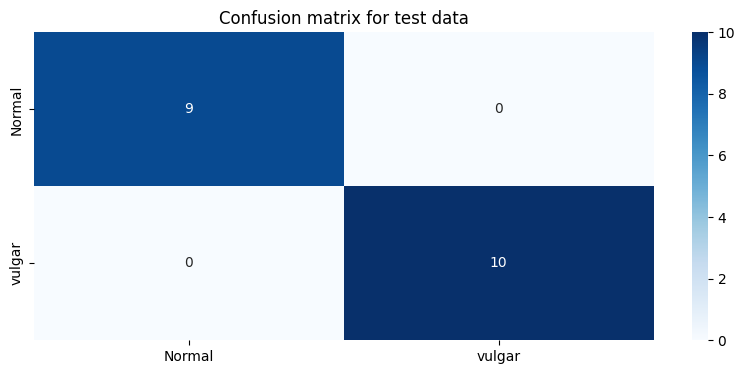

In [249]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,average_precision_score,f1_score
confusion_mat = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(10,4))
plt.title("Confusion matrix for test data")
plt.xlabel("Predicted class")
plt.ylabel("True class")

sns.heatmap(confusion_mat, annot=True, cmap="Blues",  xticklabels = target_names,
           yticklabels=target_names)
plt.show()

In [218]:
def predict_text_sample(test_text, inv_type_dict, clf, count_vec):
  test_sample = [test_text]
  x_test_sample_fetaures = count_vec.transform(test_sample)
  y_pred_test_sample = clf.predict(x_test_sample_fetaures)

  return inv_type_dict[y_pred_test_sample[0]]

#**Prediction**

In [219]:
test_text ="నా పేరు రాజ "
print("Prediced class is " , predict_text_sample(test_text, inv_type_dict, clf, count_vec))

Prediced class is  Normal


In [220]:
test_text ="ఈ లంజా కొడుకు ఫోన్ లిఫ్ట్ చెయ్యడం లేదు "
print("Prediced class is " , predict_text_sample(test_text, inv_type_dict, clf, count_vec))

Prediced class is  vulgar


#**SVM**

In [223]:
from sklearn.svm import SVC

# Create an instance of the SVM classifier
clf = SVC(kernel='linear')

# Train the classifier on your data
clf.fit(x_train_features, y_train)


SVC(kernel='linear')

In [224]:
print("Test score :- ", clf.score(x_test_features, y_test))

Test score :-  0.5263157894736842


In [225]:
from sklearn.metrics import classification_report

y_pred_test = clf.predict(x_test_features)
target_names = list(inv_type_dict.values())

In [226]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         9
      vulgar       0.53      1.00      0.69        10

    accuracy                           0.53        19
   macro avg       0.26      0.50      0.34        19
weighted avg       0.28      0.53      0.36        19



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


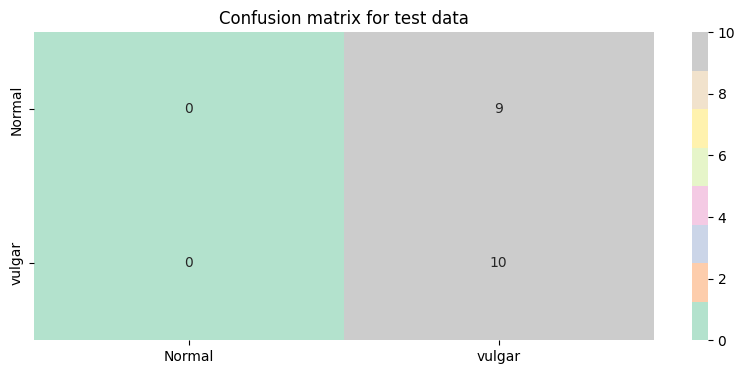

In [259]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,average_precision_score,f1_score
confusion_mat = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(10,4))
plt.title("Confusion matrix for test data")
plt.xlabel("Predicted class")
plt.ylabel("True class")

sns.heatmap(confusion_mat, annot=True, cmap="Pastel2",  xticklabels = target_names,
           yticklabels=target_names)
plt.show()

In [228]:
def predict_text_sample(test_text, inv_type_dict, clf, count_vec):
  test_sample = [test_text]
  x_test_sample_fetaures = count_vec.transform(test_sample)
  y_pred_test_sample = clf.predict(x_test_sample_fetaures)

  return inv_type_dict[y_pred_test_sample[0]]

In [229]:
test_text ="ఈ లంజా కొడుకు ఫోన్ లిఫ్ట్ చెయ్యడం లేదు "
print("Prediced class is " , predict_text_sample(test_text, inv_type_dict, clf, count_vec))

Prediced class is  vulgar


In [230]:
test_text ="నా పేరు  "
print("Prediced class is " , predict_text_sample(test_text, inv_type_dict, clf, count_vec))

Prediced class is  vulgar


#**LogisticRegression**

In [251]:
from sklearn.linear_model import LogisticRegression

# Create an instance of Logistic Regression
clf = LogisticRegression()
clf.fit(x_train_features, y_train)

# You can also specify additional parameters, if needed
# For example, to set the regularization strength (C) to 0.5:
# clf = LogisticRegression(C=0.5)


LogisticRegression()

In [252]:
print("Test score :- ", clf.score(x_test_features, y_test))

Test score :-  0.5263157894736842


In [253]:
from sklearn.metrics import classification_report

y_pred_test = clf.predict(x_test_features)
target_names = list(inv_type_dict.values())

In [254]:
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         9
      vulgar       0.53      1.00      0.69        10

    accuracy                           0.53        19
   macro avg       0.26      0.50      0.34        19
weighted avg       0.28      0.53      0.36        19



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


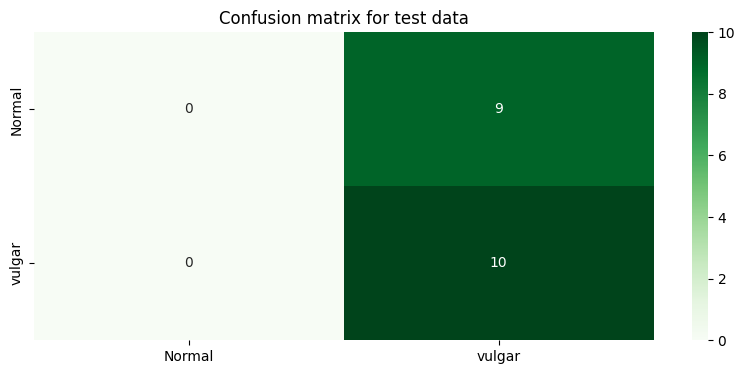

In [255]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,average_precision_score,f1_score
confusion_mat = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(10,4))
plt.title("Confusion matrix for test data")
plt.xlabel("Predicted class")
plt.ylabel("True class")

sns.heatmap(confusion_mat, annot=True, cmap="Greens",  xticklabels = target_names,
           yticklabels=target_names)
plt.show()

In [236]:
test_text ="ఈ లంజా కొడుకు ఫోన్ లిఫ్ట్ చెయ్యడం లేదు "
print("Prediced class is " , predict_text_sample(test_text, inv_type_dict, clf, count_vec))

Prediced class is  vulgar


In [237]:
test_text ="నా పేరు  "
print("Prediced class is " , predict_text_sample(test_text, inv_type_dict, clf, count_vec))

Prediced class is  vulgar
